In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import proplot as pplt
from matplotlib_scalebar.scalebar import ScaleBar
from skimage.restoration import unwrap_phase

## inside the scan region

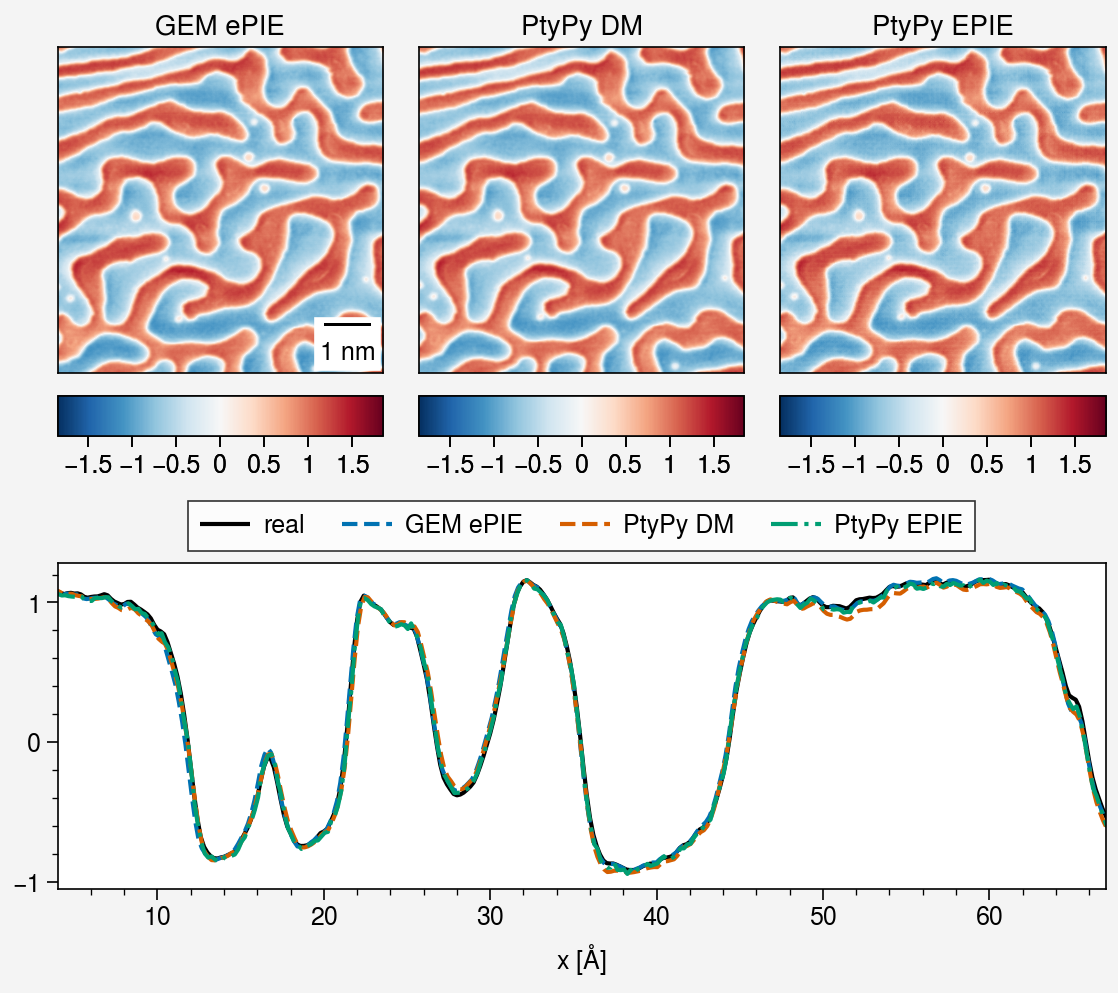

In [5]:
origin_phs = np.load("../object_phase.npy")[70:425, 70:425]
GEM_phs = np.load(r'task_SimpleSimMag3_ePIE_padding_2\corrected_phase.npy')
# GEM_phs = unwrap_phase(np.angle(GEM) - 1.8)
DM_phs = np.load(r'task_SimpleSimMag3_PtyPy_DM_padding_2_full_support\corrected_phase.npy')
# DM_phs = unwrap_phase(np.angle(DM) - 2.4)
EPIE_phs = np.load(r'task_SimpleSimMag3_PtyPy_EPIE_200_padding_2\corrected_phase.npy')
# EPIE_phs = unwrap_phase(np.angle(EPIE) - 2.4)

fig, (ax1, ax2, ax3, axpf) = pplt.subplots(
    figwidth="14.2cm",
    array=[[1, 2, 3], [4, 4, 4]],
    xticks=[], yticks=[],
    share=False)
X = np.arange(GEM_phs.shape[1]) * 0.19798036801729185 # angstrom

margin = 4 # angstrom
m = ax1.imshow(GEM_phs, extent=[X[0], X[-1], X[0], X[-1]], vmin=-np.pi/1.7, vmax=np.pi/1.7)
ax1.add_artist(ScaleBar(0.1, 'nm', location='lower right'))
ax1.colorbar(m, loc="b")
m = ax2.imshow(DM_phs, extent=[X[0], X[-1], X[0], X[-1]], vmin=-np.pi/1.7, vmax=np.pi/1.7)
ax2.colorbar(m, loc="b")
m = ax3.imshow(EPIE_phs, extent=[X[0], X[-1], X[0], X[-1]], vmin=-np.pi/1.7, vmax=np.pi/1.7)
ax3.colorbar(m, loc="b")

ax1.format(title='GEM ePIE')
ax2.format(title='PtyPy DM')
ax3.format(title='PtyPy EPIE')

axpf.plot(np.arange(origin_phs.shape[1]) * 0.20 + 0.2, origin_phs[origin_phs.shape[0]//2-2], label='real', linestyle='-', color='black')

X = X
axpf.plot(X, GEM_phs[GEM_phs.shape[0]//2+1], label='GEM ePIE', linestyle='--')
X = np.arange(DM_phs.shape[1]) * 0.19998036801729185
axpf.plot(X-0.35, DM_phs[DM_phs.shape[0]//2], label='PtyPy DM', linestyle='--')
X = np.arange(EPIE_phs.shape[1]) * 0.19998036801729185
axpf.plot(X-0.35, EPIE_phs[EPIE_phs.shape[0]//2], label='PtyPy EPIE', linestyle='-.')

axpf.legend(ncols=4, loc='t')
axpf.format(xlim=(X[0]+margin, X[-1]-margin), xticks=10, yticks=1, xlabel='x [$\AA$]')

# inset = axpf.inset([22, -0.2, 12, 1.5], transform='data', zoom=True, zoom_kw={'color': 'red3', 'lw': 2, 'ls': '--'})
# inset.format(xlim=(19.5, 24.5), ylim=(-1.7, -0.8))

# inset.plot(np.arange(origin_phs.shape[1]) * 0.20 + 0.2, origin_phs[origin_phs.shape[0]//2-2], label='real', linestyle='-', color='black')
# inset.plot(X, GEM_phs[GEM_phs.shape[0]//2], label='GEM ePIE', linestyle='--')
# inset.plot(X-0.35, DM_phs[DM_phs.shape[0]//2], label='PtyPy DM', linestyle='--')
# inset.plot(X-0.35, EPIE_phs[EPIE_phs.shape[0]//2], label='PtyPy EPIE', linestyle='-.')

fig.savefig('ProfileAnalysis2.pdf')

In [19]:
DM_phs.shape

(355, 355)